#  Asthma Prediction  


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read CSV file and show the shape of data frame

In [49]:
data_frame = pd.read_csv("FinalData.csv")

In [50]:
data_frame.shape

(309226, 10)

#### Header and Trailer values of the data frame

In [51]:
data_frame.head(10)

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,HEPA,1.50,M,False,False,False,False,False,False,False
1,RV5,28.00,F,False,True,True,True,False,True,True
2,FLU3,53.00,F,False,False,False,False,False,False,False
3,HEP,69.00,M,False,False,False,False,False,False,False
4,HEPA,24.00,F,False,False,True,True,False,True,True
5,TDAP,35.00,F,False,False,False,False,False,False,False
6,VARZOS,65.00,F,False,False,False,False,False,False,False
7,PPV,1.58,F,False,False,True,True,False,False,True
8,FLU4,0.33,F,False,False,False,False,False,False,False
9,FLU4,62.00,M,False,False,False,False,False,False,False


In [52]:
data_frame.tail(10)

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
309216,SMALL,26.0,F,False,False,False,False,False,False,False
309217,SMALL,53.0,F,False,False,False,True,False,True,True
309218,FLUN3,30.0,F,False,False,False,False,False,False,False
309219,HEPA,33.0,M,False,False,False,False,False,False,False
309220,TDAP,29.0,F,False,False,False,False,False,False,False
309221,TYP,31.0,M,False,False,False,False,False,False,False
309222,FLU3,88.0,F,False,False,False,False,False,False,False
309223,HIBV,13.0,F,True,False,True,True,False,False,True
309224,FLU3,8.0,M,False,False,False,False,False,False,False
309225,FLUX,10.0,F,False,False,False,False,False,False,False


#### Column features

#### Checking for null values in the data frame; if there then delete corresponding rows

In [53]:
print(data_frame.isnull().values.any())
data_frame = data_frame.dropna()
print(data_frame.isnull().values.any())

True
False


### Correlated Feature Check¶
Helper function that displays correlation by color. Red is most correlated, Blue least.

In [54]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

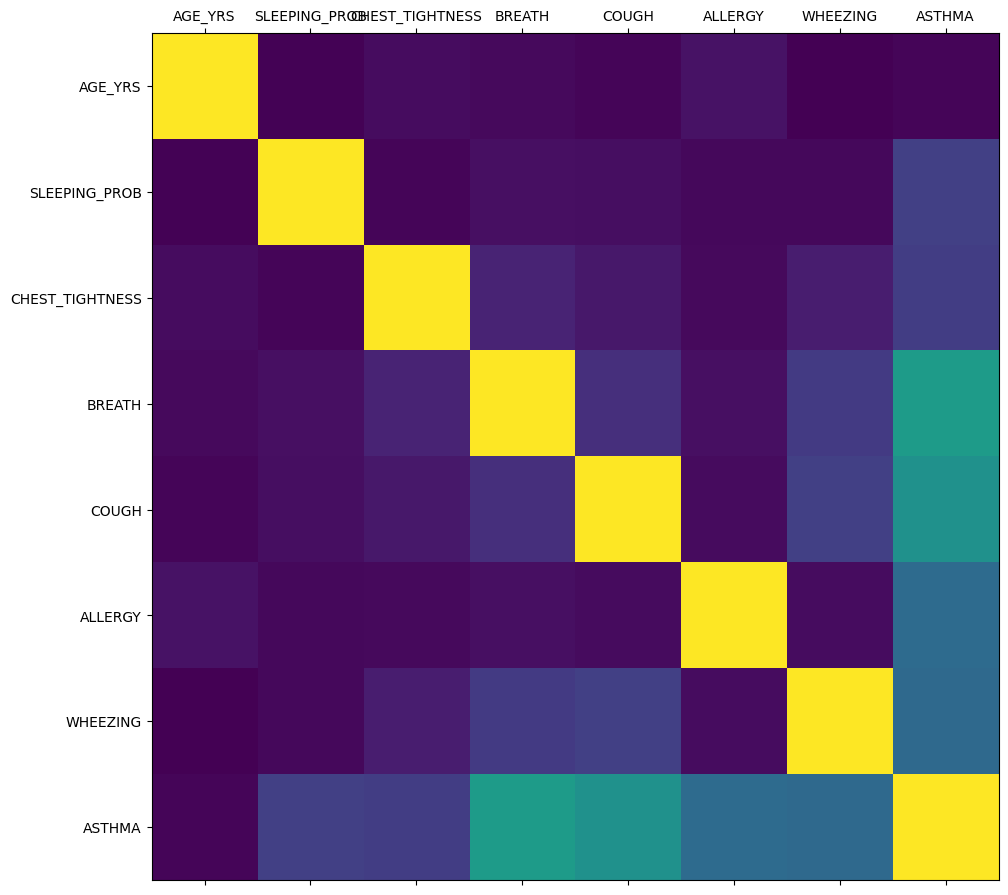

In [55]:
plot_corr(data_frame)

In [56]:
data_frame.corr()

,AGE_YRS,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
AGE_YRS,1.000000,-0.011846,0.015164,0.006681,-0.001917,0.030050,-0.017687,-0.004622
SLEEPING_PROB,-0.011846,1.000000,-0.002622,0.023940,0.021967,0.003580,0.005711,0.175386
CHEST_TIGHTNESS,0.015164,-0.002622,1.000000,0.081891,0.048109,0.008594,0.062756,0.165649
BREATH,0.006681,0.023940,0.081891,1.000000,0.119734,0.023684,0.155419,0.540411
COUGH,-0.001917,0.021967,0.048109,0.119734,1.000000,0.013764,0.176555,0.498538
ALLERGY,0.030050,0.003580,0.008594,0.023684,0.013764,1.000000,0.017389,0.337186
WHEEZING,-0.017687,0.005711,0.062756,0.155419,0.176555,0.017389,1.000000,0.330540
ASTHMA,-0.004622,0.175386,0.165649,0.540411,0.498538,0.337186,0.330540,1.000000


### Map all string values by unique integer values for each unique string

In [57]:
asthma_map = {True : 1, False : 0}
data_frame['ASTHMA'] = data_frame['ASTHMA'].map(asthma_map)

sleep_map = {True : 1, False : 0}
data_frame['SLEEPING_PROB'] = data_frame['SLEEPING_PROB'].map(sleep_map)

chest_map = {True : 1, False : 0}
data_frame['CHEST_TIGHTNESS'] = data_frame['CHEST_TIGHTNESS'].map(chest_map)

breath_map = {True : 1, False : 0}
data_frame['BREATH'] = data_frame['BREATH'].map(breath_map)

cough_map = {True : 1, False : 0}
data_frame['COUGH'] = data_frame['COUGH'].map(cough_map)

allergy_map = {True : 1, False : 0}
data_frame['ALLERGY'] = data_frame['ALLERGY'].map(allergy_map)

sex_map = {'M' : 1, 'F' : 0, 'U' : 2}
data_frame['SEX'] = data_frame['SEX'].map(sex_map)

wheezing_map = {True : 1, False : 0}
data_frame['WHEEZING'] = data_frame['WHEEZING'].map(wheezing_map)


vax_data = data_frame['VAX_TYPE']
vax=[]
for items in vax_data:
    if items in vax:
        continue
    else:
        #print(items)
        vax.append(items)
#print("Vax list: ")
#print(vax)

key=0
vax_map={key: value for (key, value) in zip(vax,range(len(vax))) }
data_frame['VAX_TYPE'] = data_frame['VAX_TYPE'].map(vax_map)

#### Dataset after mapping

In [58]:
data_frame.head(10)

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,0,1.50,1,0,0,0,0,0,0,0
1,1,28.00,0,0,1,1,1,0,1,1
2,2,53.00,0,0,0,0,0,0,0,0
3,3,69.00,1,0,0,0,0,0,0,0
4,0,24.00,0,0,0,1,1,0,1,1
5,4,35.00,0,0,0,0,0,0,0,0
6,5,65.00,0,0,0,0,0,0,0,0
7,6,1.58,0,0,0,1,1,0,0,1
8,7,0.33,0,0,0,0,0,0,0,0
9,7,62.00,1,0,0,0,0,0,0,0


###### Checking again of there any null values

In [59]:
data_frame.isnull().values.any()

False

### Check class distribution¶
Rare events are hard to predict

In [60]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['ASTHMA'] == 1])
num_false = len(data_frame.loc[data_frame['ASTHMA'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  16089 (6.54%)
Number of False cases: 229771 (93.46%)


### Spliting the data
70% for training, 30% for testing

In [61]:
from sklearn.model_selection import train_test_split

feature_col_names = ['VAX_TYPE', 'AGE_YRS', 'SEX', 'SLEEPING_PROB', 'CHEST_TIGHTNESS', 'BREATH', 'COUGH', 'ALLERGY','WHEEZING']
predicted_class_names = ['ASTHMA']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

#### making sure have we got 70% training data and 30% test data

In [62]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

70.00% in training set
30.00% in test set


### Now verify whether the predicted value was split correctly

In [63]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['ASTHMA'] == 1]), (len(data_frame.loc[data_frame['ASTHMA'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['ASTHMA'] == 0]), (len(data_frame.loc[data_frame['ASTHMA'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 16089 (6.54%)
Original False : 229771 (93.46%)

Training True  : 11272 (6.55%)
Training False : 160830 (93.45%)

Test True      : 4817 (6.53%)
Test False     : 68941 (93.47%)


### Data Scaling

In [64]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

## Training Algorithm - Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

#### Naive Bayes Performance on Train Data and  Test Data

In [66]:
from sklearn import metrics

# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.9667
Accuracy of our naive bayes model is: 0.9676


#### Confusion matrix and classification report of Naive Bayes

In [67]:
print("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

print("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1,0])))

Confusion Matrix
[[ 4817     0]
 [ 2392 66549]]
Classification Report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80      4817
           0       1.00      0.97      0.98     68941

    accuracy                           0.97     73758
   macro avg       0.83      0.98      0.89     73758
weighted avg       0.98      0.97      0.97     73758



#### ROC curve(point moving  to the upper left is better)

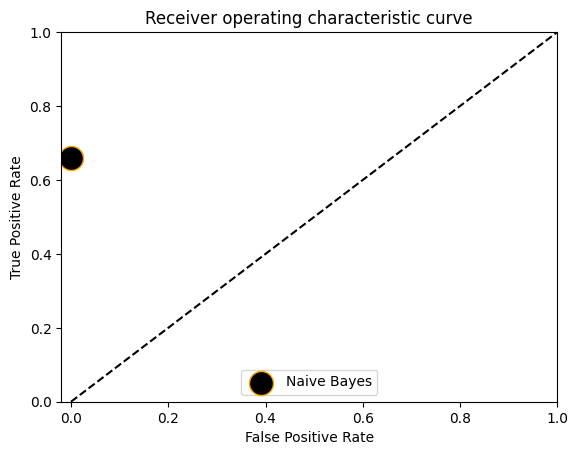

In [68]:
# fpr, tpr
import numpy as np
#import matplotlib.pyplot as plt

naive_bayes = np.array([0, 0.66])

# plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='black', edgecolors='orange', s=300)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower center')

plt.show()

## Training algorithm: Logistic Regression 

In [69]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=50)
lr_model.fit(X_train, y_train.ravel())

lr_predict_train = lr_model.predict(X_train)

#### Accuracy on train set and test set

In [70]:
#get accuracy
from sklearn import metrics
lr_accuracy = metrics.accuracy_score(y_train, lr_predict_train)

#print accuracy
from sklearn import metrics
print("\nLR performance on Training Data:")
print("Accuracy: {0:.4f}\n".format(lr_accuracy))


lr_predict_test = lr_model.predict(X_test)

#get accuracy
lr_accuracy_testdata = metrics.accuracy_score(y_test, lr_predict_test)

#print accuracy
print("LR performance on Test Data:")
print("Accuracy: {0:.4f}\n".format(lr_accuracy_testdata))


LR performance on Training Data:
Accuracy: 0.9670

LR performance on Test Data:
Accuracy: 0.9681



#### Confusion matrix and classification report

In [71]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion Matrix for LR")
print("{0}".format(confusion_matrix(y_test,lr_predict_test,labels=[1,0])))  

print("\nClassification Report")
print("{0}".format(classification_report(y_test,lr_predict_test, labels=[1, 0]))) 

Confusion Matrix for LR
[[ 4552   265]
 [ 2091 66850]]

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.94      0.79      4817
           0       1.00      0.97      0.98     68941

    accuracy                           0.97     73758
   macro avg       0.84      0.96      0.89     73758
weighted avg       0.98      0.97      0.97     73758



#### ROC curve(point moving  to the upper left is better)

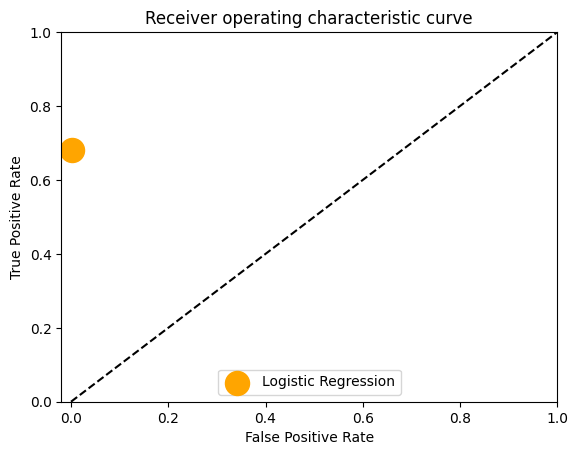

In [72]:
import numpy as np
#import matplotlib.pyplot as plt


logistic = np.array([0.003, 0.68])

# plotting
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=300)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower center')

plt.show()

## Training algorithm: Artificial Neural Network

In [73]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.ravel()) 

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

#### Accuracy on train set and test set

In [74]:
from sklearn import metrics
print("ANN performance on Training Data:")
print("Accuracy: {0:.4f}\n".format(metrics.accuracy_score(y_train, mlp.predict(X_train))))

predictions = mlp.predict(X_test)  
print("ANN performance on Test Data:")
print("Accuracy: {0:.4f}\n".format(metrics.accuracy_score(y_test, predictions)))

ANN performance on Training Data:
Accuracy: 0.9680

ANN performance on Test Data:
Accuracy: 0.9694



#### Confusion matrix and classification report

In [75]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion Matrix for Artificial Neural Network")
print("{0}".format(confusion_matrix(y_test,predictions,labels=[1,0])))  

print("\nClassification Report")
print("{0}".format(classification_report(y_test,predictions, labels=[1, 0]))) 

Confusion Matrix for Artificial Neural Network
[[ 4417   400]
 [ 1860 67081]]

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.92      0.80      4817
           0       0.99      0.97      0.98     68941

    accuracy                           0.97     73758
   macro avg       0.85      0.94      0.89     73758
weighted avg       0.98      0.97      0.97     73758



#### ROC curve(point moving  to the upper left is better)

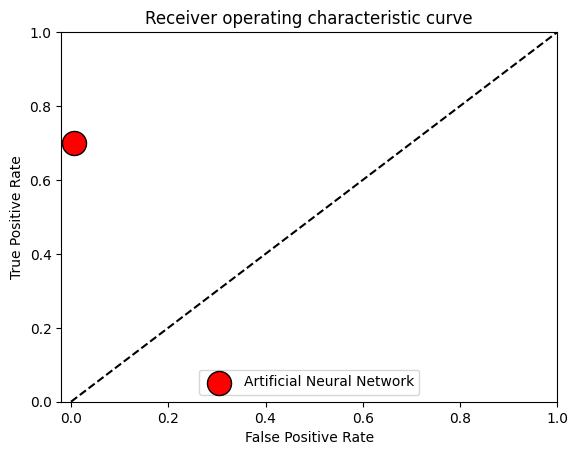

In [76]:
import numpy as np
#import matplotlib.pyplot as plt

ann = np.array([0.006,0.70 ])

# plotting
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='red', edgecolors='black', s=300)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower center')

plt.show()

## Training algorithm: Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

#### Accuracy on train set and test set

In [78]:
#get accuracy
from sklearn import metrics
rf_predict_train = rf_model.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
from sklearn import metrics
print("\nRF performance on Training Data:")
print("Accuracy: {0:.4f}\n".format(rf_accuracy))

rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print("RF performance on Test Data:")
print("Accuracy: {0:.4f}\n".format(rf_accuracy_testdata))


RF performance on Training Data:
Accuracy: 0.9899

RF performance on Test Data:
Accuracy: 0.9679



####  Confusion matrix and classification report

In [79]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion Matrix for RF")
print("{0}".format(confusion_matrix(y_test,rf_predict_test,labels=[1,0])))  

print("\nClassification Report")
print("{0}".format(classification_report(y_test,rf_predict_test, labels=[1, 0]))) 

Confusion Matrix for RF
[[ 3718  1099]
 [ 1269 67672]]

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.77      0.76      4817
           0       0.98      0.98      0.98     68941

    accuracy                           0.97     73758
   macro avg       0.86      0.88      0.87     73758
weighted avg       0.97      0.97      0.97     73758



#### ROC curve(point moving  to the upper left is better)

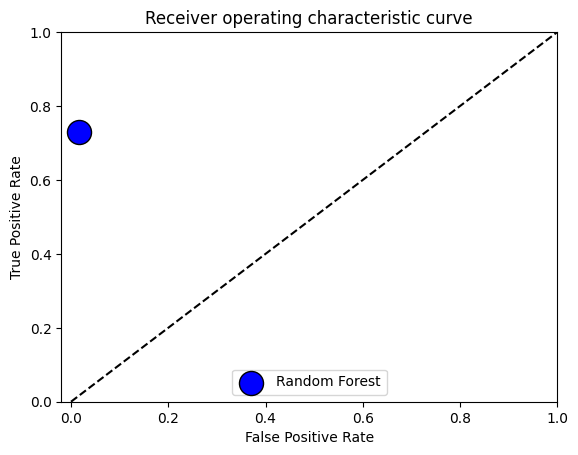

In [80]:
# fpr, tpr
import numpy as np
#import matplotlib.pyplot as plt

random_forest = np.array([0.017,0.73])


# plotting
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=300)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower center')

plt.show()

## Model Performance Revision - ROC

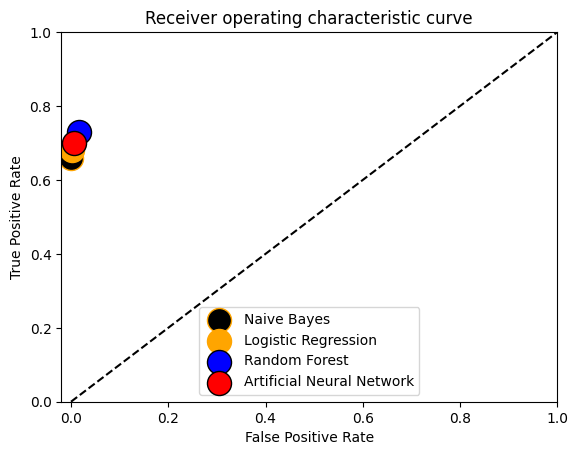

In [81]:
# fpr, tpr
import numpy as np
#import matplotlib.pyplot as plt

naive_bayes = np.array([0, 0.66])
logistic = np.array([0.003, 0.68])
ann = np.array([0.006,0.70 ])
random_forest = np.array([0.017,0.73])


# plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='black', edgecolors='orange', s=300)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=300)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=300)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='red', edgecolors='black', s=300)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower center')

plt.show()